In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,accuracy_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Checking nulls

In [3]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

## Checking data type

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

## Analysing relationship between features and label

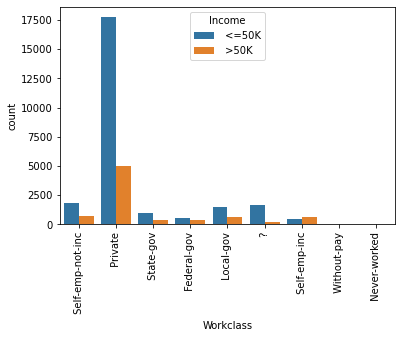

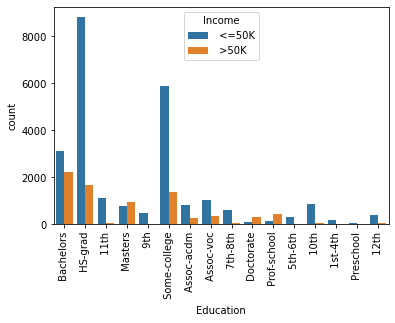

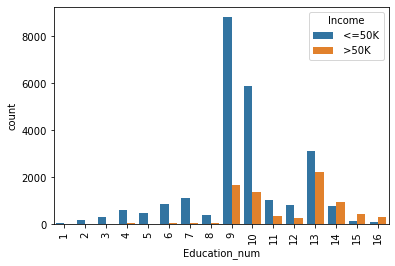

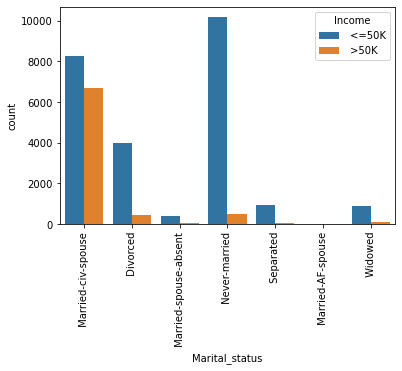

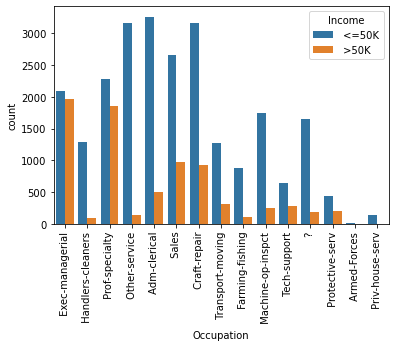

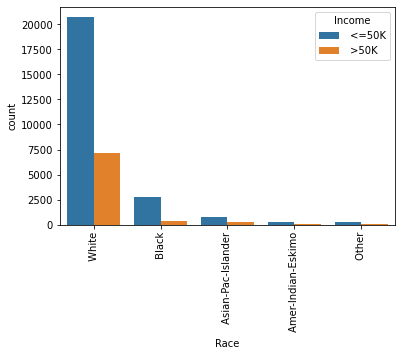

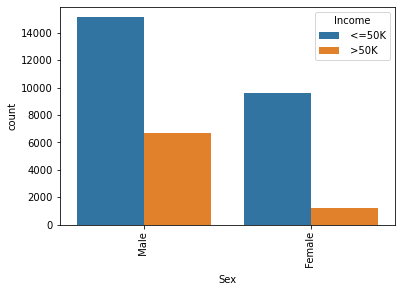

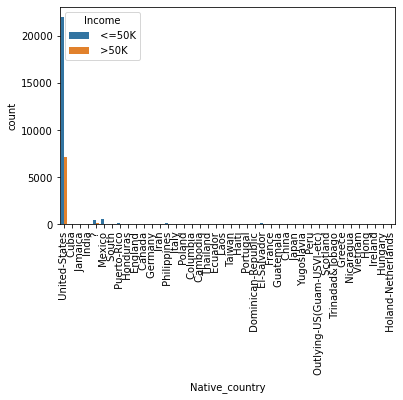

In [9]:
category=['Workclass','Education','Education_num','Marital_status','Occupation','Race','Sex','Native_country']
#Plotting count plot for each feature
for i in category:
    a=sns.countplot(x=df[i],hue=df['Income'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

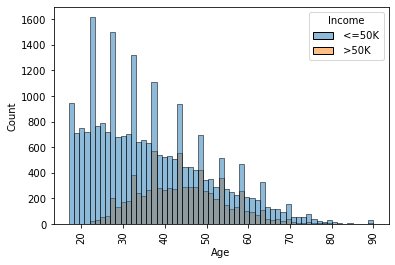

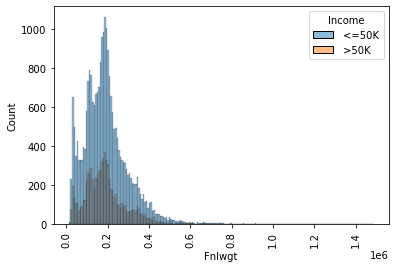

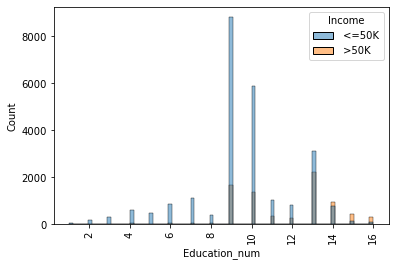

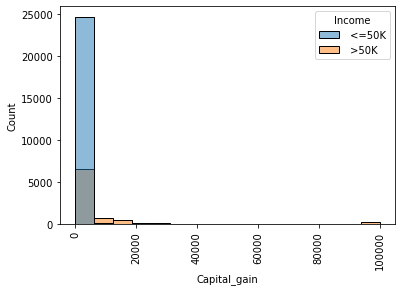

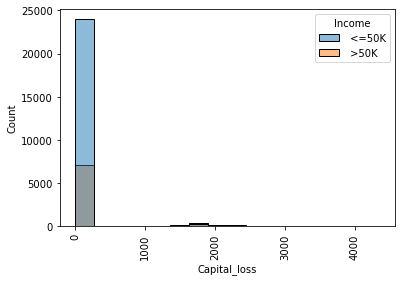

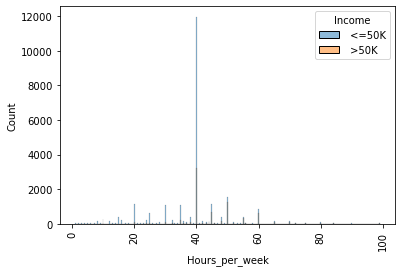

In [6]:
col=['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']
for i in col:
    a=sns.histplot(x=df[i],hue=df['Income'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

## Encoding

In [3]:
#Using ordinal encoder
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Workclass']])
df['Workclass']=df1
df2=oe.fit_transform(df[['Education']])
df['Education']=df2
df3=oe.fit_transform(df[['Marital_status']])
df['Marital_status']=df3
df1=oe.fit_transform(df[['Occupation']])
df['Occupation']=df1
df2=oe.fit_transform(df[['Race']])
df['Race']=df2
df1=oe.fit_transform(df[['Sex']])
df['Sex']=df1
df1=oe.fit_transform(df[['Native_country']])
df['Native_country']=df1
df1=oe.fit_transform(df[['Relationship']])
df['Relationship']=df1
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,<=50K
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,<=50K
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,<=50K
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,<=50K
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,<=50K


## Label Encoding

In [4]:
oe=LabelEncoder()
df1=oe.fit_transform(df[['Income']])
df['Income']=df1
df.head(20)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0,0
6,52,6.0,209642,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,45,39.0,1
7,31,4.0,45781,12.0,14,4.0,10.0,1.0,4.0,0.0,14084,0,50,39.0,1
8,42,4.0,159449,9.0,13,2.0,4.0,0.0,4.0,1.0,5178,0,40,39.0,1
9,37,4.0,280464,15.0,10,2.0,4.0,0.0,2.0,1.0,0,0,80,39.0,1


## Describing the data

In [15]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


<AxesSubplot:>

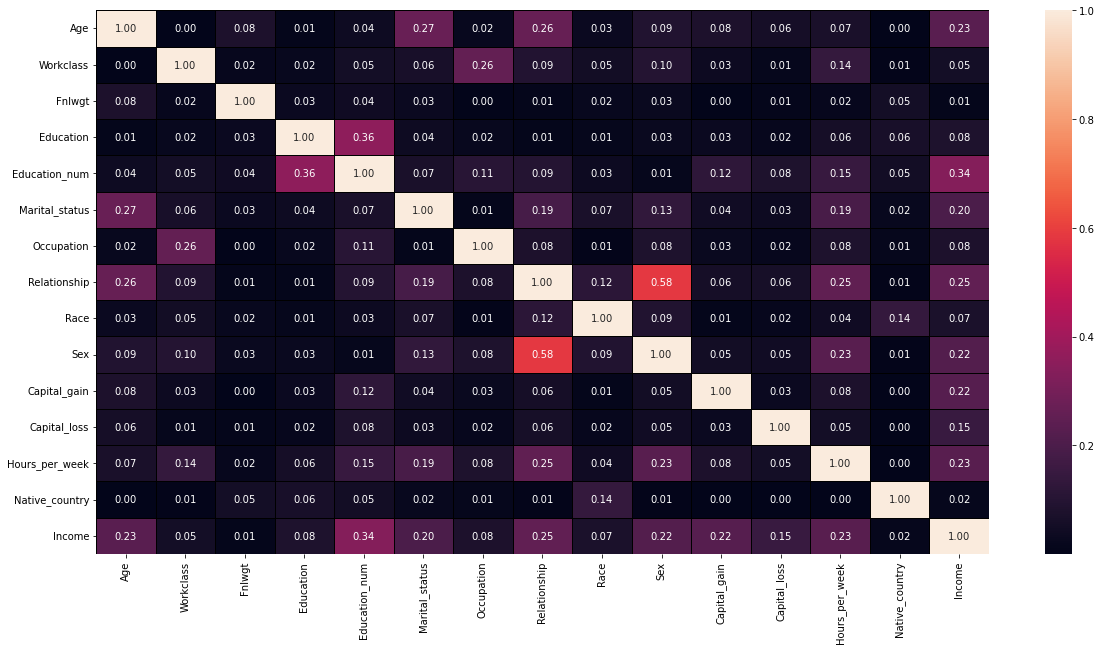

In [16]:
# Plotting heat map for better analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

Observation: Multicollinearity doesnot seems to exists but still we will check using VIF.

## Checking Outliers

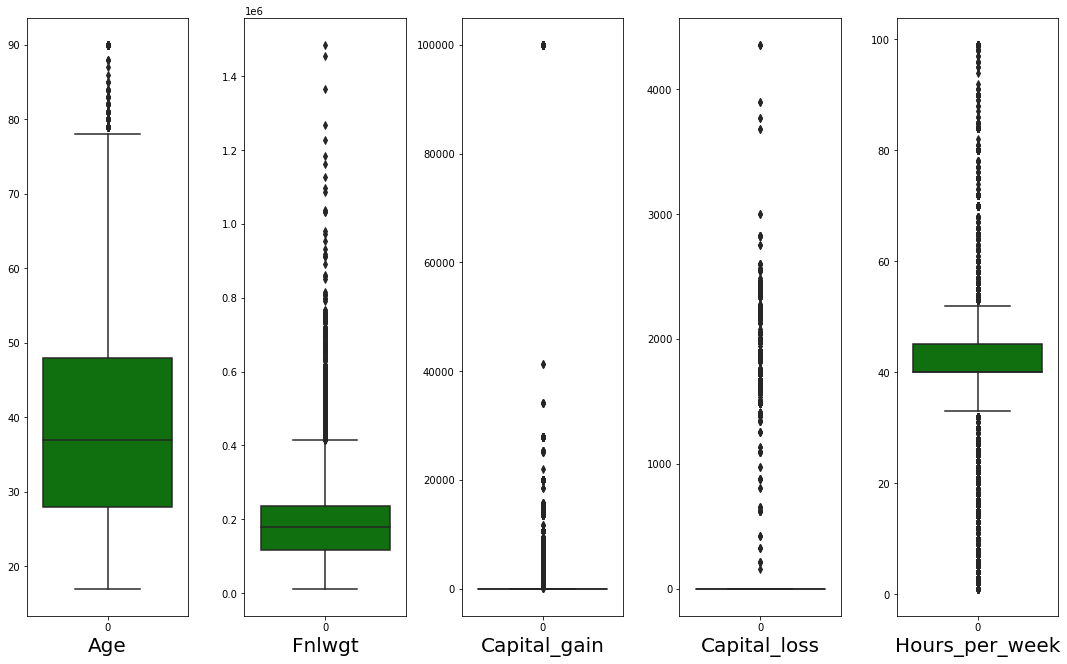

In [19]:
col=['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

Observation: We could see outliers in all the continuous features.

## Checking Skewness

In [20]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Observation: We could see skewness in Age,Fnlwgt,Capital_gain,Capital_loss taking optimal skewness range as (-0.5,0.5).

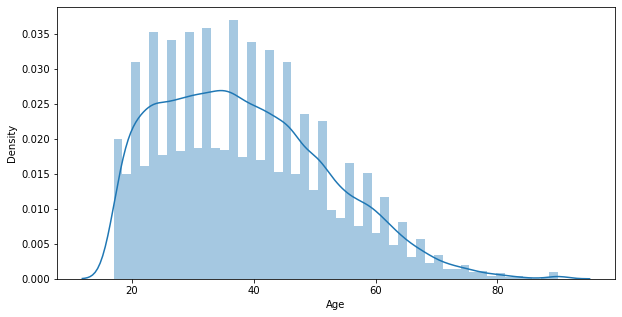

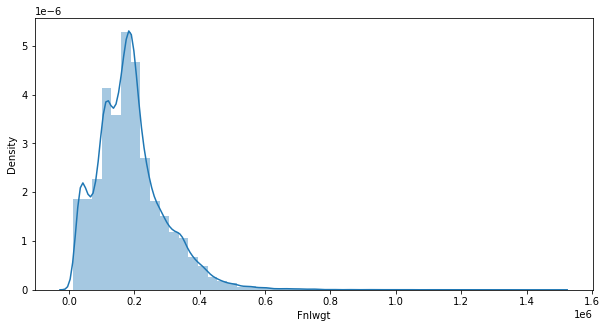

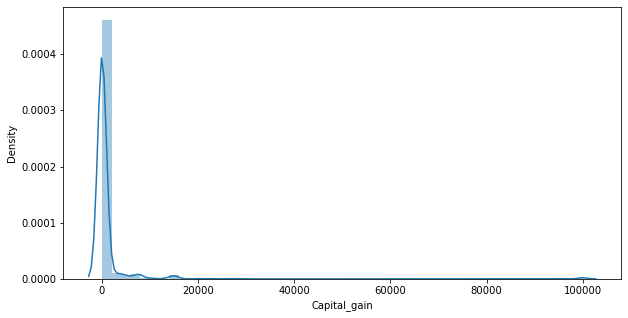

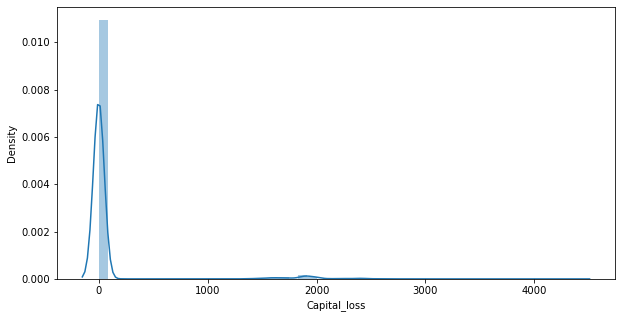

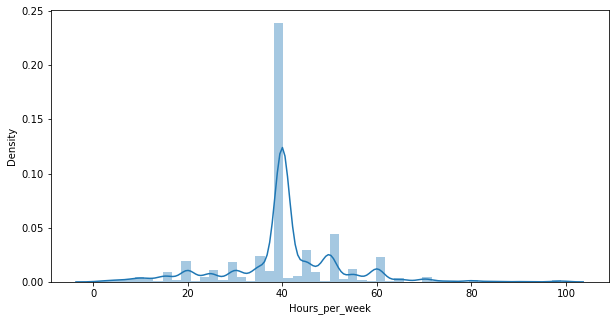

In [22]:
# Ploting Distribution plot to cross check skewness
import warnings
warnings.filterwarnings('ignore')

# for feature Length
for i in range(len(col)):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col[i]])
    plt.xlabel(col[i],fontsize=10)

Our observation was correct all the above features are skewed.

## Treating outliers

In [6]:
#Getting sure of outliers using z score
x=df.drop(['Workclass','Education','Education_num','Relationship','Marital_status','Occupation','Race','Sex','Native_country','Income'],axis=1)
z=np.abs(zscore(x))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {9, 8210, 16403, 22, 8217, 27, 31, 8223, 36, 16421, 39, 8236, 51, 24637, 8255, 8257, 16454, 76, 8269, 8275, 8281, 92, 95, 8288, 24671, 24672, 105, 111, 16504, 125, 8320, 130, 16515, 8326, 142, 147, 16534, 8344, 24731, 156, 24734, 24743, 169, 171, 8372, 181, 8374, 188, 8380, 191, 16577, 24771, 199, 8391, 8392, 202, 16584, 16592, 8401, 24789, 214, 8406, 24790, 8409, 16602, 16603, 221, 24798, 16607, 229, 24809, 8430, 8432, 243, 16630, 247, 8441, 8446, 16648, 24846, 271, 24847, 24849, 16659, 8472, 24858, 8475, 16668, 16670, 24863, 8484, 24868, 8488, 298, 24882, 8499, 311, 8504, 320, 24900, 24901, 326, 16715, 16720, 8529, 24914, 8540, 8545, 16738, 16739, 16740, 8550, 24935, 362, 8554, 8568, 16761, 380, 386, 8583, 24967, 403, 404, 16787, 24982, 407, 16791, 24983, 16796, 413, 24988, 8609, 16805, 425, 16809, 8619, 429, 433, 16817, 8627, 8631, 8633, 16826, 8653, 25038, 8657, 25041, 467, 8668, 25056, 16867, 8677, 8679, 16875, 25074, 8693, 25077, 507, 509, 8703, 16900, 8709, 8710

In [24]:
df.shape

(32560, 15)

In [25]:
#Calculating Data Loss
loss=((32560-2532)/32560)*100
print("The data loss-",100-loss,"%")

The data loss- 7.7764127764127835 %


We could bear with 7% data loss as we have huge dataset, so lets drop these rows.

In [7]:
#removing rows with outliers
df=df.drop(x.index[i[0]])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0


In [29]:
df.shape

(30028, 15)

In [30]:
#Checking skewness again
df.skew()

Age                0.489206
Workclass         -0.747158
Fnlwgt             0.633615
Education         -0.927349
Education_num     -0.324321
Marital_status    -0.047716
Occupation         0.119988
Relationship       0.745900
Race              -2.431921
Sex               -0.681754
Capital_gain       4.957931
Capital_loss      29.761341
Hours_per_week    -0.350891
Native_country    -3.660301
Income             1.339595
dtype: float64

We need to treat skewness still its present.

## VIF

In [31]:

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,8.859700,Age
1,8.534848,Workclass
2,4.593571,Fnlwgt
3,9.143250,Education
4,19.784912,Education_num
5,4.090704,Marital_status
6,3.686807,Occupation
7,2.680971,Relationship
8,17.549721,Race
9,4.349699,Sex


VIf score of categorical data is above 10 so we wont consider that and thus no multicollinearity exists.

## checking dataset is balanced or not

In [32]:
df['Income'].value_counts()

0    23369
1     6659
Name: Income, dtype: int64

Observation: We could observe that the data is not at all balanced. So lets balance this data.

## Data Balancing

In [8]:
from sklearn.utils import resample

lessIncome=df[df.Income==0]
moreIncome=df[df.Income==1]
more_upsampled=resample(moreIncome,replace=True,n_samples=len(lessIncome),random_state=27)
df_up=pd.concat([lessIncome,more_upsampled])
df_up['Income'].value_counts()

0    23369
1    23369
Name: Income, dtype: int64

## Treating Skewness

In [9]:
x=df_up.drop(['Income'],axis=1)
y=df_up['Income']

In [10]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.79642926,  1.60403285, -1.11866683, ..., -0.03305119,
        -2.40163907,  0.31642799],
       [-0.10125788, -0.00276099,  0.4281847 , ..., -0.03305119,
        -0.19603245,  0.31642799],
       [ 1.00337318, -0.00276099,  0.60887383, ..., -0.03305119,
        -0.19603245,  0.31642799],
       ...,
       [-0.26403121, -0.00276099,  0.15350696, ..., -0.03305119,
         0.77594561,  0.31642799],
       [-0.78142343, -0.00276099, -0.09960227, ..., -0.03305119,
         0.97821875,  0.31642799],
       [ 0.51055774, -1.3380368 ,  0.35054674, ..., -0.03305119,
        -0.19603245,  0.31642799]])

## Standardisation of data

In [11]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.79642926,  1.60403285, -1.11866683, ..., -0.03305119,
        -2.40163907,  0.31642799],
       [-0.10125788, -0.00276099,  0.4281847 , ..., -0.03305119,
        -0.19603245,  0.31642799],
       [ 1.00337318, -0.00276099,  0.60887383, ..., -0.03305119,
        -0.19603245,  0.31642799],
       ...,
       [-0.26403121, -0.00276099,  0.15350696, ..., -0.03305119,
         0.77594561,  0.31642799],
       [-0.78142343, -0.00276099, -0.09960227, ..., -0.03305119,
         0.97821875,  0.31642799],
       [ 0.51055774, -1.3380368 ,  0.35054674, ..., -0.03305119,
        -0.19603245,  0.31642799]])

## Train test split

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
max_ac=0
randomState=0
lr=LogisticRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        if round(accuracy_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(accuracy_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 11

Train Accuracy-  77.7

Test Accuracy-  77.7


At random state: 19

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 29

Train Accuracy-  77.7

Test Accuracy-  77.7


At random state: 34

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 41

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 54

Train Accuracy-  77.7

Test Accuracy-  77.7


At random state: 56

Train Accuracy-  77.7

Test Accuracy-  77.7


At random state: 85

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 109

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 123

Train Accuracy-  77.7

Test Accuracy-  77.7


At random state: 125

Train Accuracy-  77.7

Test Accuracy-  77.7


At random state: 134

Train Accuracy-  77.7

Test Accuracy-  77.7


At random state: 135

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 166

Train Accuracy-  77.5

Test Accuracy-  77.5


At random state: 170

Train Accuracy-  77.7

Test Accu

## Applying Logistic Regression

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=round(accuracy_score(y_train,pred_train)*100,1)
test_accuracy=round(accuracy_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",train_accuracy)
print("\ntest accuracy-",test_accuracy)


train accuracy- 77.7

test accuracy- 77.7


## Cross Validation score

In [53]:
for i in range(4,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_accuracy)



At cv- 4

 cross validation score is- 77.65630893957366

 Accuracy score is- 77.7


At cv- 5

 cross validation score is- 77.5942516594649

 Accuracy score is- 77.7


At cv- 6

 cross validation score is- 77.62634818542304

 Accuracy score is- 77.7


At cv- 7

 cross validation score is- 77.61994308975159

 Accuracy score is- 77.7


At cv- 8

 cross validation score is- 77.63490658186252

 Accuracy score is- 77.7


At cv- 9

 cross validation score is- 77.64132574853828

 Accuracy score is- 77.7


At cv- 10

 cross validation score is- 77.61567031575798

 Accuracy score is- 77.7


At cv- 11

 cross validation score is- 77.6413377263627

 Accuracy score is- 77.7


At cv- 12

 cross validation score is- 77.64135447290731

 Accuracy score is- 77.7


At cv- 13

 cross validation score is- 77.63704914212897

 Accuracy score is- 77.7


At cv- 14

 cross validation score is- 77.64138164469882

 Accuracy score is- 77.7


At cv- 15

 cross validation score is- 77.63279190027684

 Accuracy sco

So we are getting the least difference between cross_val_score and accuracy score at cv=19

In [28]:
cv_score_best=cross_val_score(lr,x,y,cv=19).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for linear regression model is-",test_accuracy)

cross validation score is- 77.6370777716467
accuracy score for linear regression model is- 77.7


## Confusion matrix

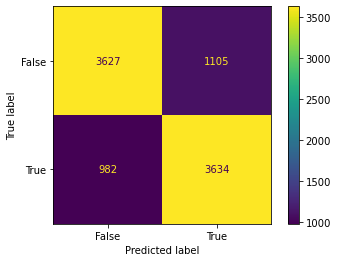

In [55]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

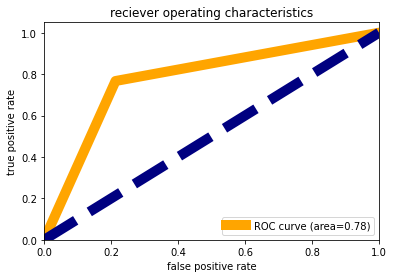

In [56]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [57]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      4732
           1       0.77      0.79      0.78      4616

    accuracy                           0.78      9348
   macro avg       0.78      0.78      0.78      9348
weighted avg       0.78      0.78      0.78      9348



## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [58]:

dt=DecisionTreeClassifier()
for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    dt_pred_train=dt.predict(x_train)
    dt_pred_test=dt.predict(x_test)
    dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
    dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
    print("\n At random state:",i)
    print("acc train",dt_acc_train)
    print("acc test",dt_acc_test)


 At random state: 0
acc train 100.0
acc test 91.4

 At random state: 1
acc train 100.0
acc test 92.1

 At random state: 2
acc train 100.0
acc test 92.0

 At random state: 3
acc train 100.0
acc test 91.6

 At random state: 4
acc train 100.0
acc test 92.4

 At random state: 5
acc train 100.0
acc test 92.0

 At random state: 6
acc train 100.0
acc test 92.0

 At random state: 7
acc train 100.0
acc test 91.8

 At random state: 8
acc train 100.0
acc test 92.3

 At random state: 9
acc train 100.0
acc test 92.1

 At random state: 10
acc train 100.0
acc test 92.1

 At random state: 11
acc train 100.0
acc test 92.1

 At random state: 12
acc train 100.0
acc test 92.0

 At random state: 13
acc train 100.0
acc test 91.5

 At random state: 14
acc train 100.0
acc test 92.1

 At random state: 15
acc train 100.0
acc test 92.0

 At random state: 16
acc train 100.0
acc test 92.7

 At random state: 17
acc train 100.0
acc test 92.1

 At random state: 18
acc train 100.0
acc test 92.2

 At random state: 19


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=38,test_size=0.20)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
print("acc train",dt_acc_train)
print("acc test",dt_acc_test)

acc train 100.0
acc test 92.2


## Cross Validation score

In [60]:
for i in range(4,15):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",dt_acc_test)



At cv- 4

 cross validation score is- 91.64064572612969

 Accuracy score is- 92.2


At cv- 5

 cross validation score is- 91.95088921462379

 Accuracy score is- 92.2


At cv- 6

 cross validation score is- 92.481497583928

 Accuracy score is- 92.2


At cv- 7

 cross validation score is- 92.48577644392697

 Accuracy score is- 92.2


At cv- 8

 cross validation score is- 92.54783299486161

 Accuracy score is- 92.2


At cv- 9

 cross validation score is- 92.8623444625444

 Accuracy score is- 92.2


At cv- 10

 cross validation score is- 92.83881924045681

 Accuracy score is- 92.2


At cv- 11

 cross validation score is- 92.83024548430966

 Accuracy score is- 92.2


At cv- 12

 cross validation score is- 92.8302360653158

 Accuracy score is- 92.2


At cv- 13

 cross validation score is- 92.7703713206536

 Accuracy score is- 92.2


At cv- 14

 cross validation score is- 92.85166919566362

 Accuracy score is- 92.2


So we are getting the least difference between cross_val_score and accuracy score at cv=5

In [31]:
cv_score_best_dt=cross_val_score(dt,x,y,cv=5).mean()*100
print("cross validation score is-",cv_score_best_dt)
print("accuracy score for decision tree classifier model is-",dt_acc_test)

cross validation score is- 92.04503294941449
accuracy score for decision tree classifier model is- 92.2


## Confusion matrix

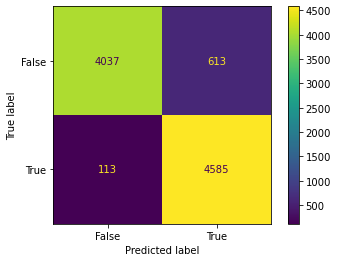

In [63]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

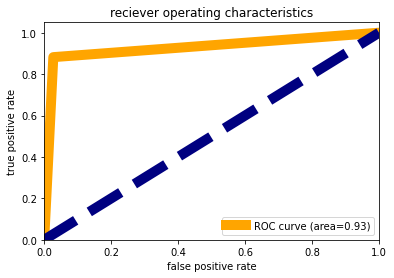

In [64]:
fpr,tpr,thresholds=roc_curve(dt_pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [65]:
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4650
           1       0.88      0.98      0.93      4698

    accuracy                           0.92      9348
   macro avg       0.93      0.92      0.92      9348
weighted avg       0.93      0.92      0.92      9348



## Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:

rf=RandomForestClassifier()
max_ac=0
randomState=0

for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  100.0

Test Accuracy-  93.1


At random state: 1

Train Accuracy-  100.0

Test Accuracy-  93.3


At random state: 2

Train Accuracy-  100.0

Test Accuracy-  93.4


At random state: 3

Train Accuracy-  100.0

Test Accuracy-  93.2


At random state: 4

Train Accuracy-  100.0

Test Accuracy-  93.3


At random state: 5

Train Accuracy-  100.0

Test Accuracy-  93.1


At random state: 6

Train Accuracy-  100.0

Test Accuracy-  93.3


At random state: 7

Train Accuracy-  100.0

Test Accuracy-  93.2


At random state: 8

Train Accuracy-  100.0

Test Accuracy-  93.0


At random state: 9

Train Accuracy-  100.0

Test Accuracy-  93.2


At random state: 10

Train Accuracy-  100.0

Test Accuracy-  93.1


At random state: 11

Train Accuracy-  100.0

Test Accuracy-  93.4


At random state: 12

Train Accuracy-  100.0

Test Accuracy-  93.5


At random state: 13

Train Accuracy-  100.0

Test Accuracy-  93.2


At random state: 14

Train Accuracy-  100.0

Test Accura

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
rf_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  100.0

Test Accuracy-  93.8


## Cross Validation Score

In [68]:
for i in range(4,15):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 4

 cross validation score is- 93.11909285848115

 Accuracy score is- 93.7


At cv- 5

 cross validation score is- 93.4378966632346

 Accuracy score is- 93.7


At cv- 6

 cross validation score is- 93.82730261612812

 Accuracy score is- 93.7


At cv- 7

 cross validation score is- 93.94496958627934

 Accuracy score is- 93.7


At cv- 8

 cross validation score is- 94.1118590215512

 Accuracy score is- 93.7


At cv- 9

 cross validation score is- 94.10544494100887

 Accuracy score is- 93.7


At cv- 10

 cross validation score is- 94.1546540404866

 Accuracy score is- 93.7


At cv- 11

 cross validation score is- 94.2295268604849

 Accuracy score is- 93.7


At cv- 12

 cross validation score is- 94.28944863003083

 Accuracy score is- 93.7


At cv- 13

 cross validation score is- 94.32796601385249

 Accuracy score is- 93.7


At cv- 14

 cross validation score is- 94.35150114701439

 Accuracy score is- 93.7


So we are getting the least difference between cross_val_score and accuracy score at cv=6

In [35]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=6).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest classifier model is-",rf_test_acc)

cross validation score is- 93.82943963907276
accuracy score for random forest classifier model is- 93.7


## Confusion Matrix

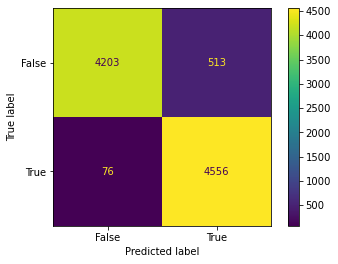

In [70]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

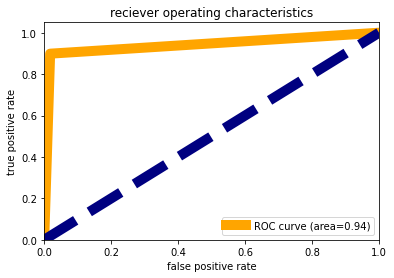

In [71]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classifictaion Report

In [72]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      4716
           1       0.90      0.98      0.94      4632

    accuracy                           0.94      9348
   macro avg       0.94      0.94      0.94      9348
weighted avg       0.94      0.94      0.94      9348



## Knn Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:

max_ac=0
randomState=0
knn=KNeighborsClassifier()
for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  88.8

Test Accuracy-  83.8


At random state: 1

Train Accuracy-  88.9

Test Accuracy-  83.3


At random state: 2

Train Accuracy-  88.6

Test Accuracy-  83.6


At random state: 3

Train Accuracy-  88.9

Test Accuracy-  83.5


At random state: 4

Train Accuracy-  88.9

Test Accuracy-  83.2


At random state: 5

Train Accuracy-  88.7

Test Accuracy-  84.0


At random state: 6

Train Accuracy-  88.9

Test Accuracy-  83.9


At random state: 7

Train Accuracy-  88.8

Test Accuracy-  83.8


At random state: 8

Train Accuracy-  88.9

Test Accuracy-  83.2


At random state: 9

Train Accuracy-  88.7

Test Accuracy-  83.9


At random state: 10

Train Accuracy-  88.9

Test Accuracy-  84.3


At random state: 11

Train Accuracy-  88.8

Test Accuracy-  83.8


At random state: 12

Train Accuracy-  88.4

Test Accuracy-  83.7


At random state: 13

Train Accuracy-  88.8

Test Accuracy-  84.1


At random state: 14

Train Accuracy-  88.7

Test Accuracy-  83.8


At 

In [37]:
knn=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.20)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
knn_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
knn_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",knn_train_acc)
print("\nTest Accuracy- ",knn_test_acc)


Train Accuracy-  88.9

Test Accuracy-  84.7


## Cross Validation Score

In [75]:
for i in range(4,15):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_test_acc)



At cv- 4

 cross validation score is- 83.62789368357475

 Accuracy score is- 84.7


At cv- 5

 cross validation score is- 84.05153278444881

 Accuracy score is- 84.7


At cv- 6

 cross validation score is- 84.29972175302026

 Accuracy score is- 84.7


At cv- 7

 cross validation score is- 84.4901385690492

 Accuracy score is- 84.7


At cv- 8

 cross validation score is- 84.55860456626002

 Accuracy score is- 84.7


At cv- 9

 cross validation score is- 84.55647352129918

 Accuracy score is- 84.7


At cv- 10

 cross validation score is- 84.61424670223366

 Accuracy score is- 84.7


At cv- 11

 cross validation score is- 84.63989170296936

 Accuracy score is- 84.7


At cv- 12

 cross validation score is- 84.71266262415278

 Accuracy score is- 84.7


At cv- 13

 cross validation score is- 84.84531092819392

 Accuracy score is- 84.7


At cv- 14

 cross validation score is- 84.90310459208986

 Accuracy score is- 84.7


So we are getting the least difference between cross_val_score and accuracy score at cv=4

In [38]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=4).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for Knn classifier model is-",knn_test_acc)

cross validation score is- 83.62789368357475
accuracy score for Knn classifier model is- 84.7


## Confusion Matrix

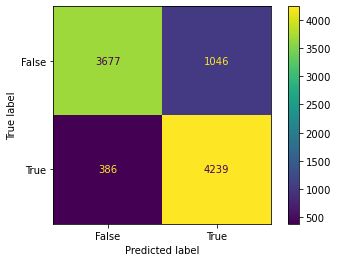

In [77]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

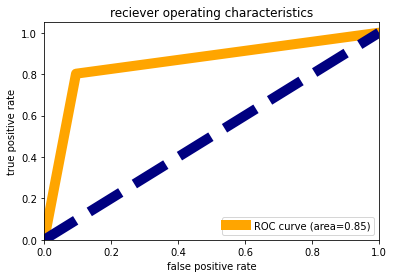

In [78]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [79]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      4723
           1       0.80      0.92      0.86      4625

    accuracy                           0.85      9348
   macro avg       0.85      0.85      0.85      9348
weighted avg       0.85      0.85      0.85      9348



## XGBoost Classifier

In [1]:
from xgboost import XGBClassifier

In [20]:
xgmod=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)
xgmod.fit(x_train,y_train)
pred_train=xgmod.predict(x_train)
pred_test=xgmod.predict(x_test)
xg_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
xg_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",xg_train_acc)
print("\nTest Accuracy- ",xg_test_acc)


Train Accuracy-  90.2

Test Accuracy-  88.2


## Cross Validation Score

In [21]:
cv_score_best_xg=cross_val_score(xgmod,x,y,cv=4).mean()*100
print("cross validation score is-",cv_score_best_xg)
print("accuracy score for Knn classifier model is-",xg_test_acc)

cross validation score is- 87.51980040071037
accuracy score for Knn classifier model is- 88.2


## Confusion Matrix

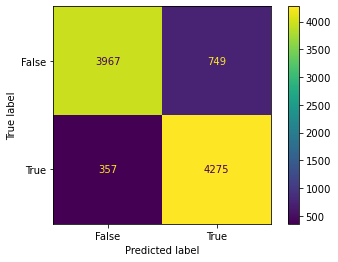

In [22]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

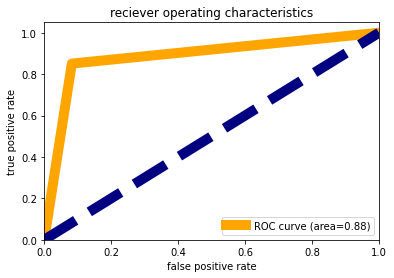

In [23]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [24]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4716
           1       0.85      0.92      0.89      4632

    accuracy                           0.88      9348
   macro avg       0.88      0.88      0.88      9348
weighted avg       0.88      0.88      0.88      9348



## Model Summary

In [39]:
models=['Logistic Regression','Decision Tree Classifier','Knn Classifier','Random Forest Classifier','XGBoost']
test_acc=[test_accuracy,dt_acc_test,knn_test_acc,rf_test_acc,xg_test_acc]
cv_score=[cv_score_best,cv_score_best_dt,cv_score_best_knn,cv_score_best_rf,cv_score_best_xg]
dfm=pd.DataFrame(list(zip(models,test_acc,cv_score)),columns=['Models','Test Accuracy','CV Score'])
dfm

,Models,Test Accuracy,CV Score
0,Logistic Regression,77.7,77.637078
1,Decision Tree Classifier,92.2,92.045033
2,Knn Classifier,84.7,83.627894
3,Random Forest Classifier,93.7,93.829440
4,XGBoost,88.2,87.519800


Observation: Looking at the confusion matrix, AUR-ROC Curve,classification report of each model and considering the least difference between cv score and aacuracy score we will finalise random forest classifier as our final model.

## Hyperparameter tuning on Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'bootstrap': [True, False],
 'max_depth': [40, 50, 60],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600] 
}

rf_reg = RandomForestClassifier()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


RandomForestClassifier(bootstrap=False, max_depth=60, n_estimators=600)

In [16]:
rf1=RandomForestClassifier(n_estimators=600,max_depth=60,bootstrap=False)
rf1.fit(x_train,y_train)
pred_train=rf1.predict(x_train)
pred_test=rf1.predict(x_test)
train_acc=round(accuracy_score(y_train,pred_train)*100,1)
test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  100.0

Test Accuracy-  94.7


## Accuracy improved from 93.7% to 94.7% by 1%. So we will finalize and save this model.

## Model Saving

In [17]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf1, open(filename, 'wb'))